## Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass 
(classes 5-7). 


### Predict : Type of glass

### Dataset Link-

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv


In [1]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# define the dataset location

filename = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'

# define the column names

names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


In [3]:
# load the csv file as a data frame

df = pd.read_csv(filename, names=names)

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The dataset contains the detailes of chemical in numerical data are present here.

In [4]:
# Checking The Dimension of th e dataset

df.shape

(214, 10)

The dataset contains 214 rows and 10 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


As we can see there are no null values present in this dataset. This gives the brief about the dataset which includes indexing type,columns type, no null values and memory usage. There are two different types of data (int64 and float64) present in the dataset.

In [6]:
# Statsical Summary

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical. Even the type which is categorical in nature is represented as integers. Please note there is no order among the classes.

### Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Glass Types')

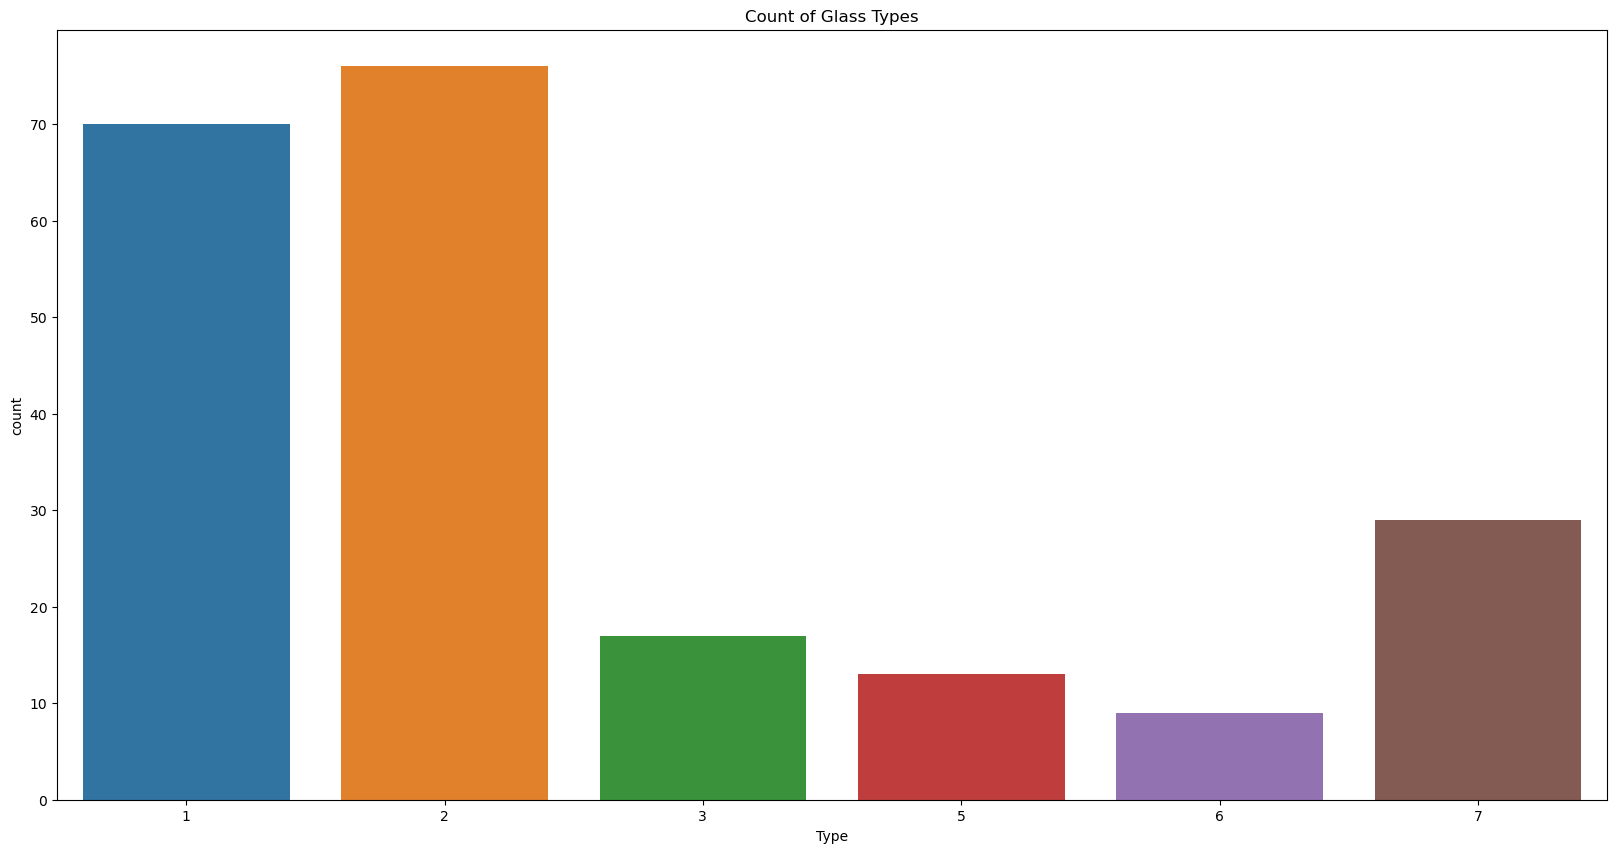

In [7]:
# # visualize the number of glass type

plt.subplots(figsize = (20,10))
sns.countplot(x='Type', data=df).set_title('Count of Glass Types')

As we can see The dataset is very unbalanced.

<Axes: >

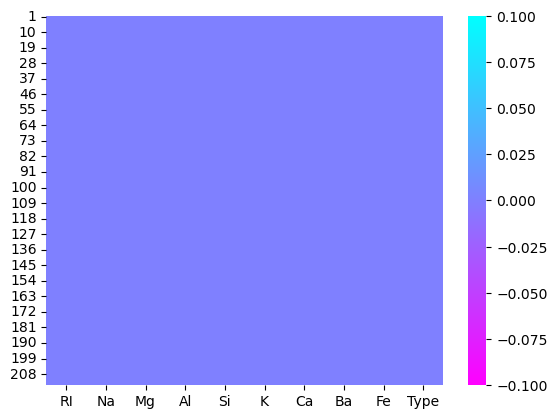

In [8]:
# let check the null values again

sns.heatmap(df.isnull(),cmap="cool_r")

In [9]:
# Checked both mean and median. mean seemed more informative

df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


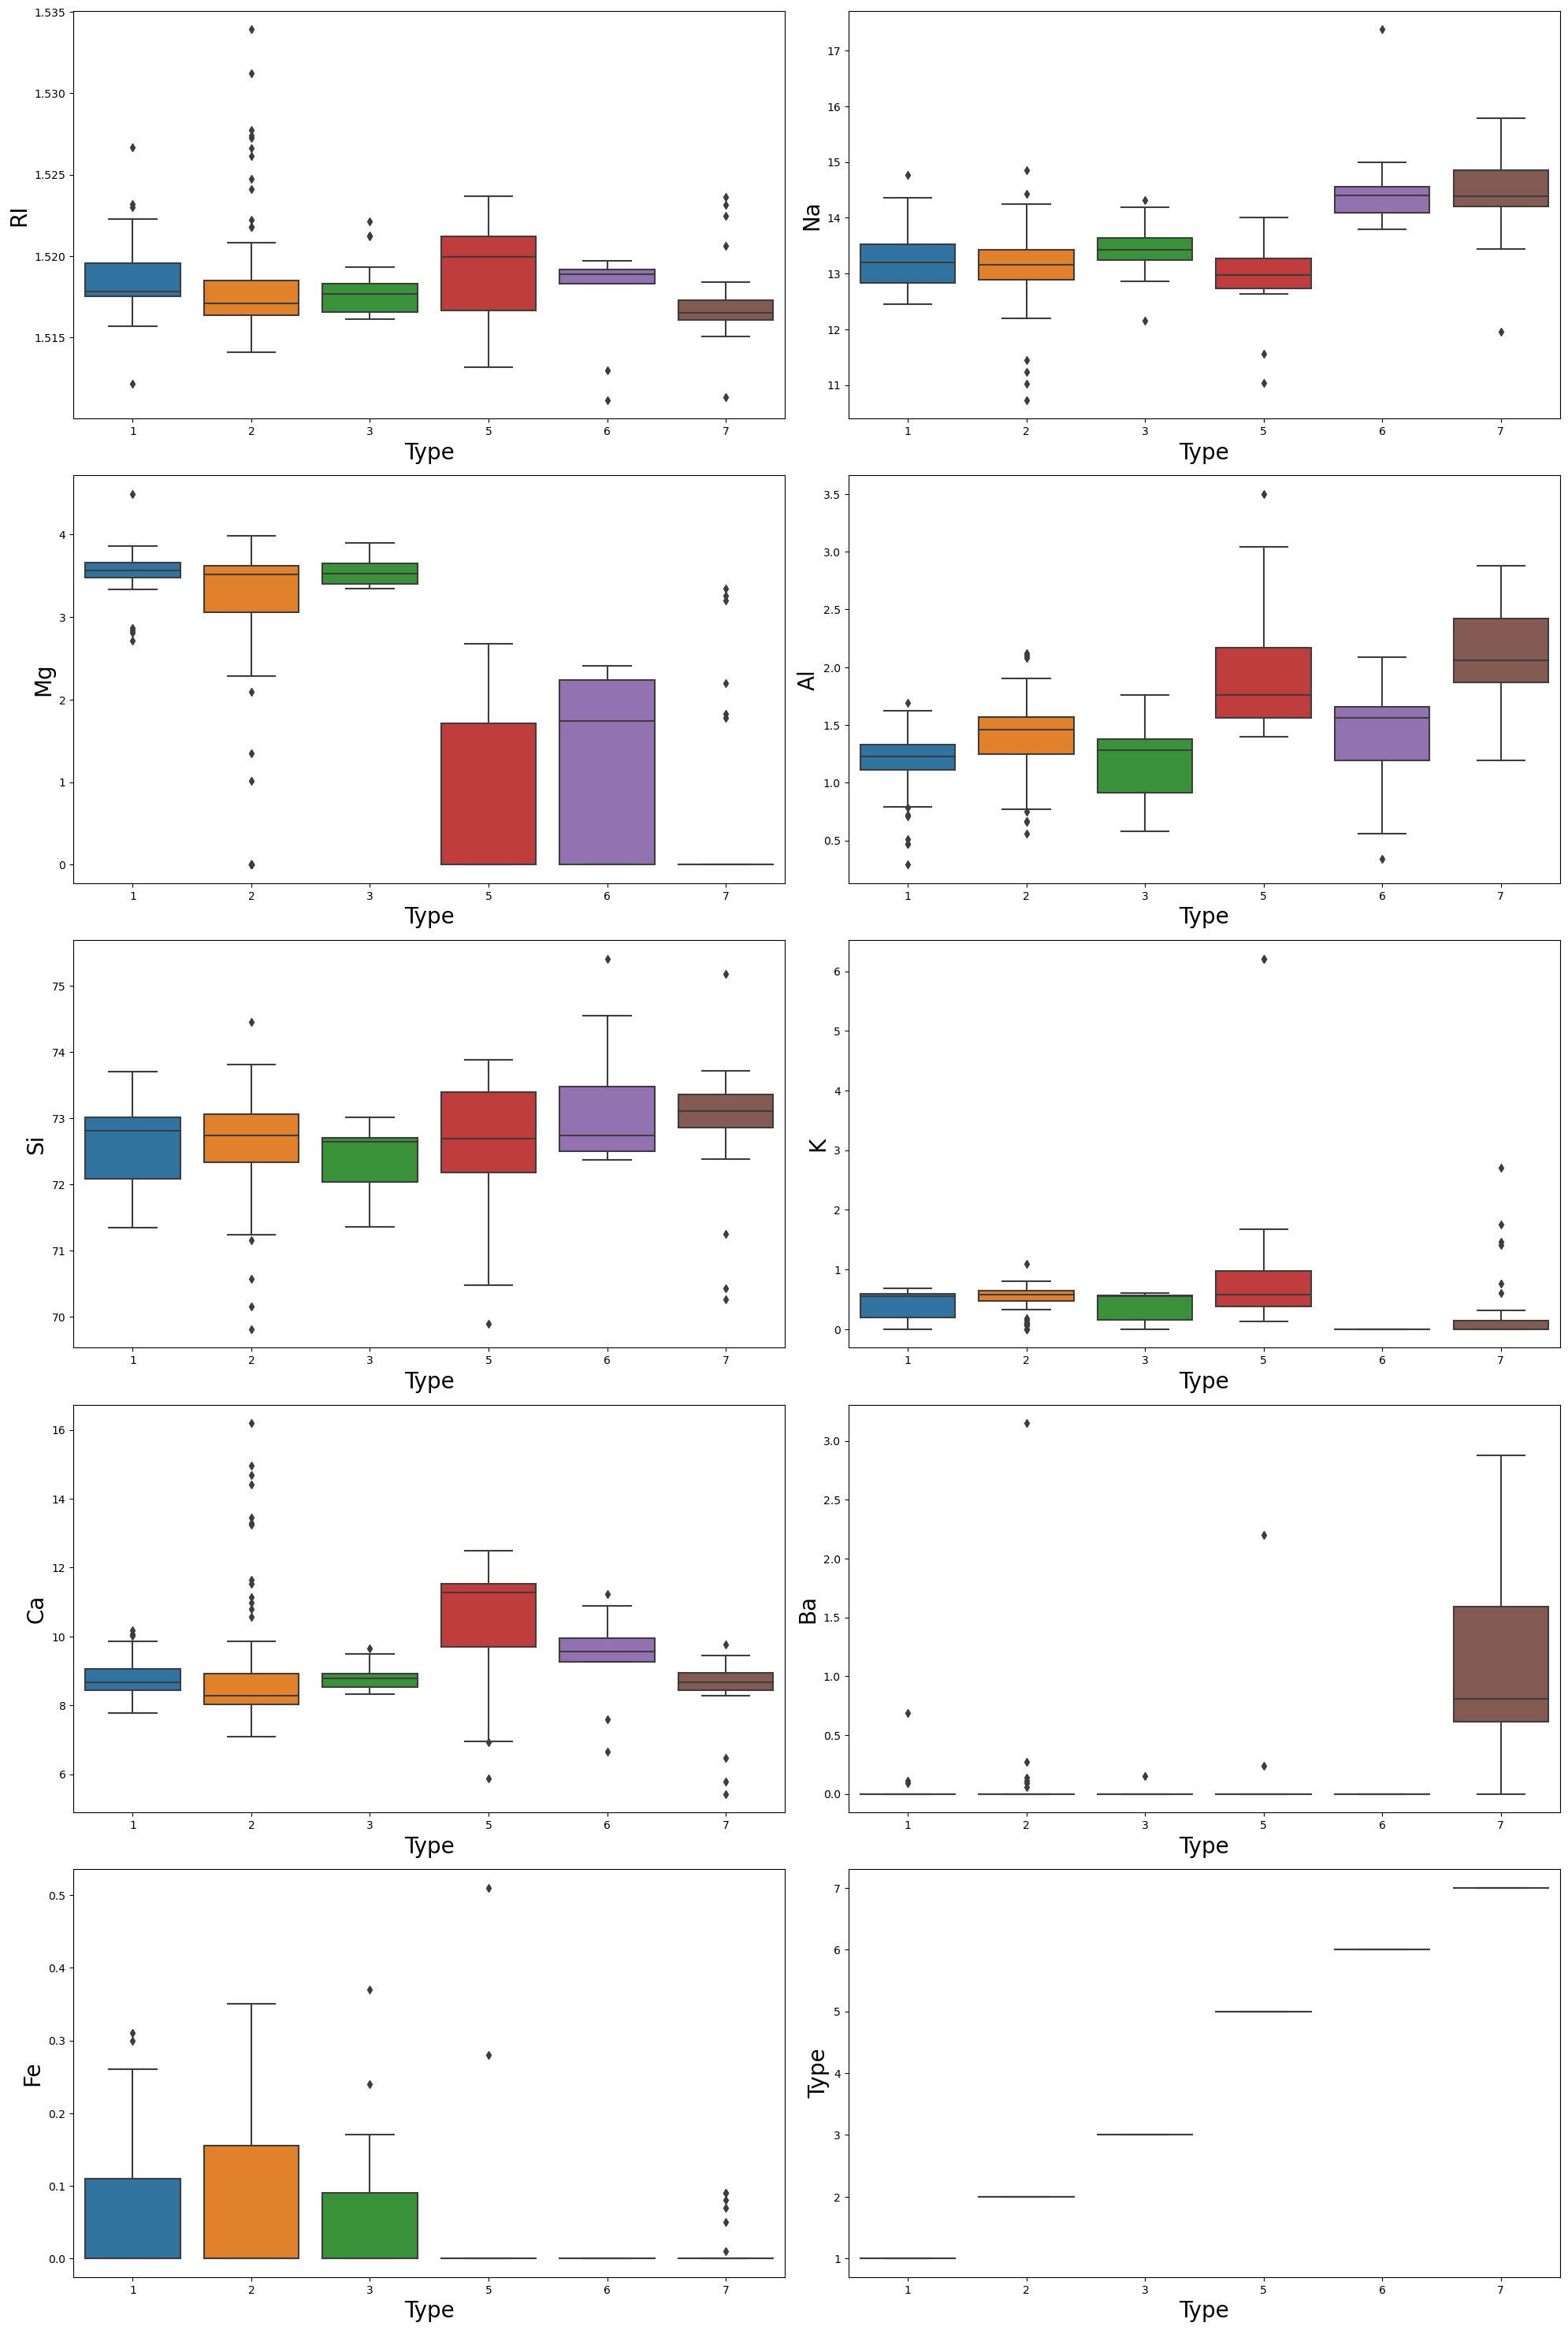

In [10]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(x="Type", y=column, data=df) 
        plt.xlabel('Type',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()


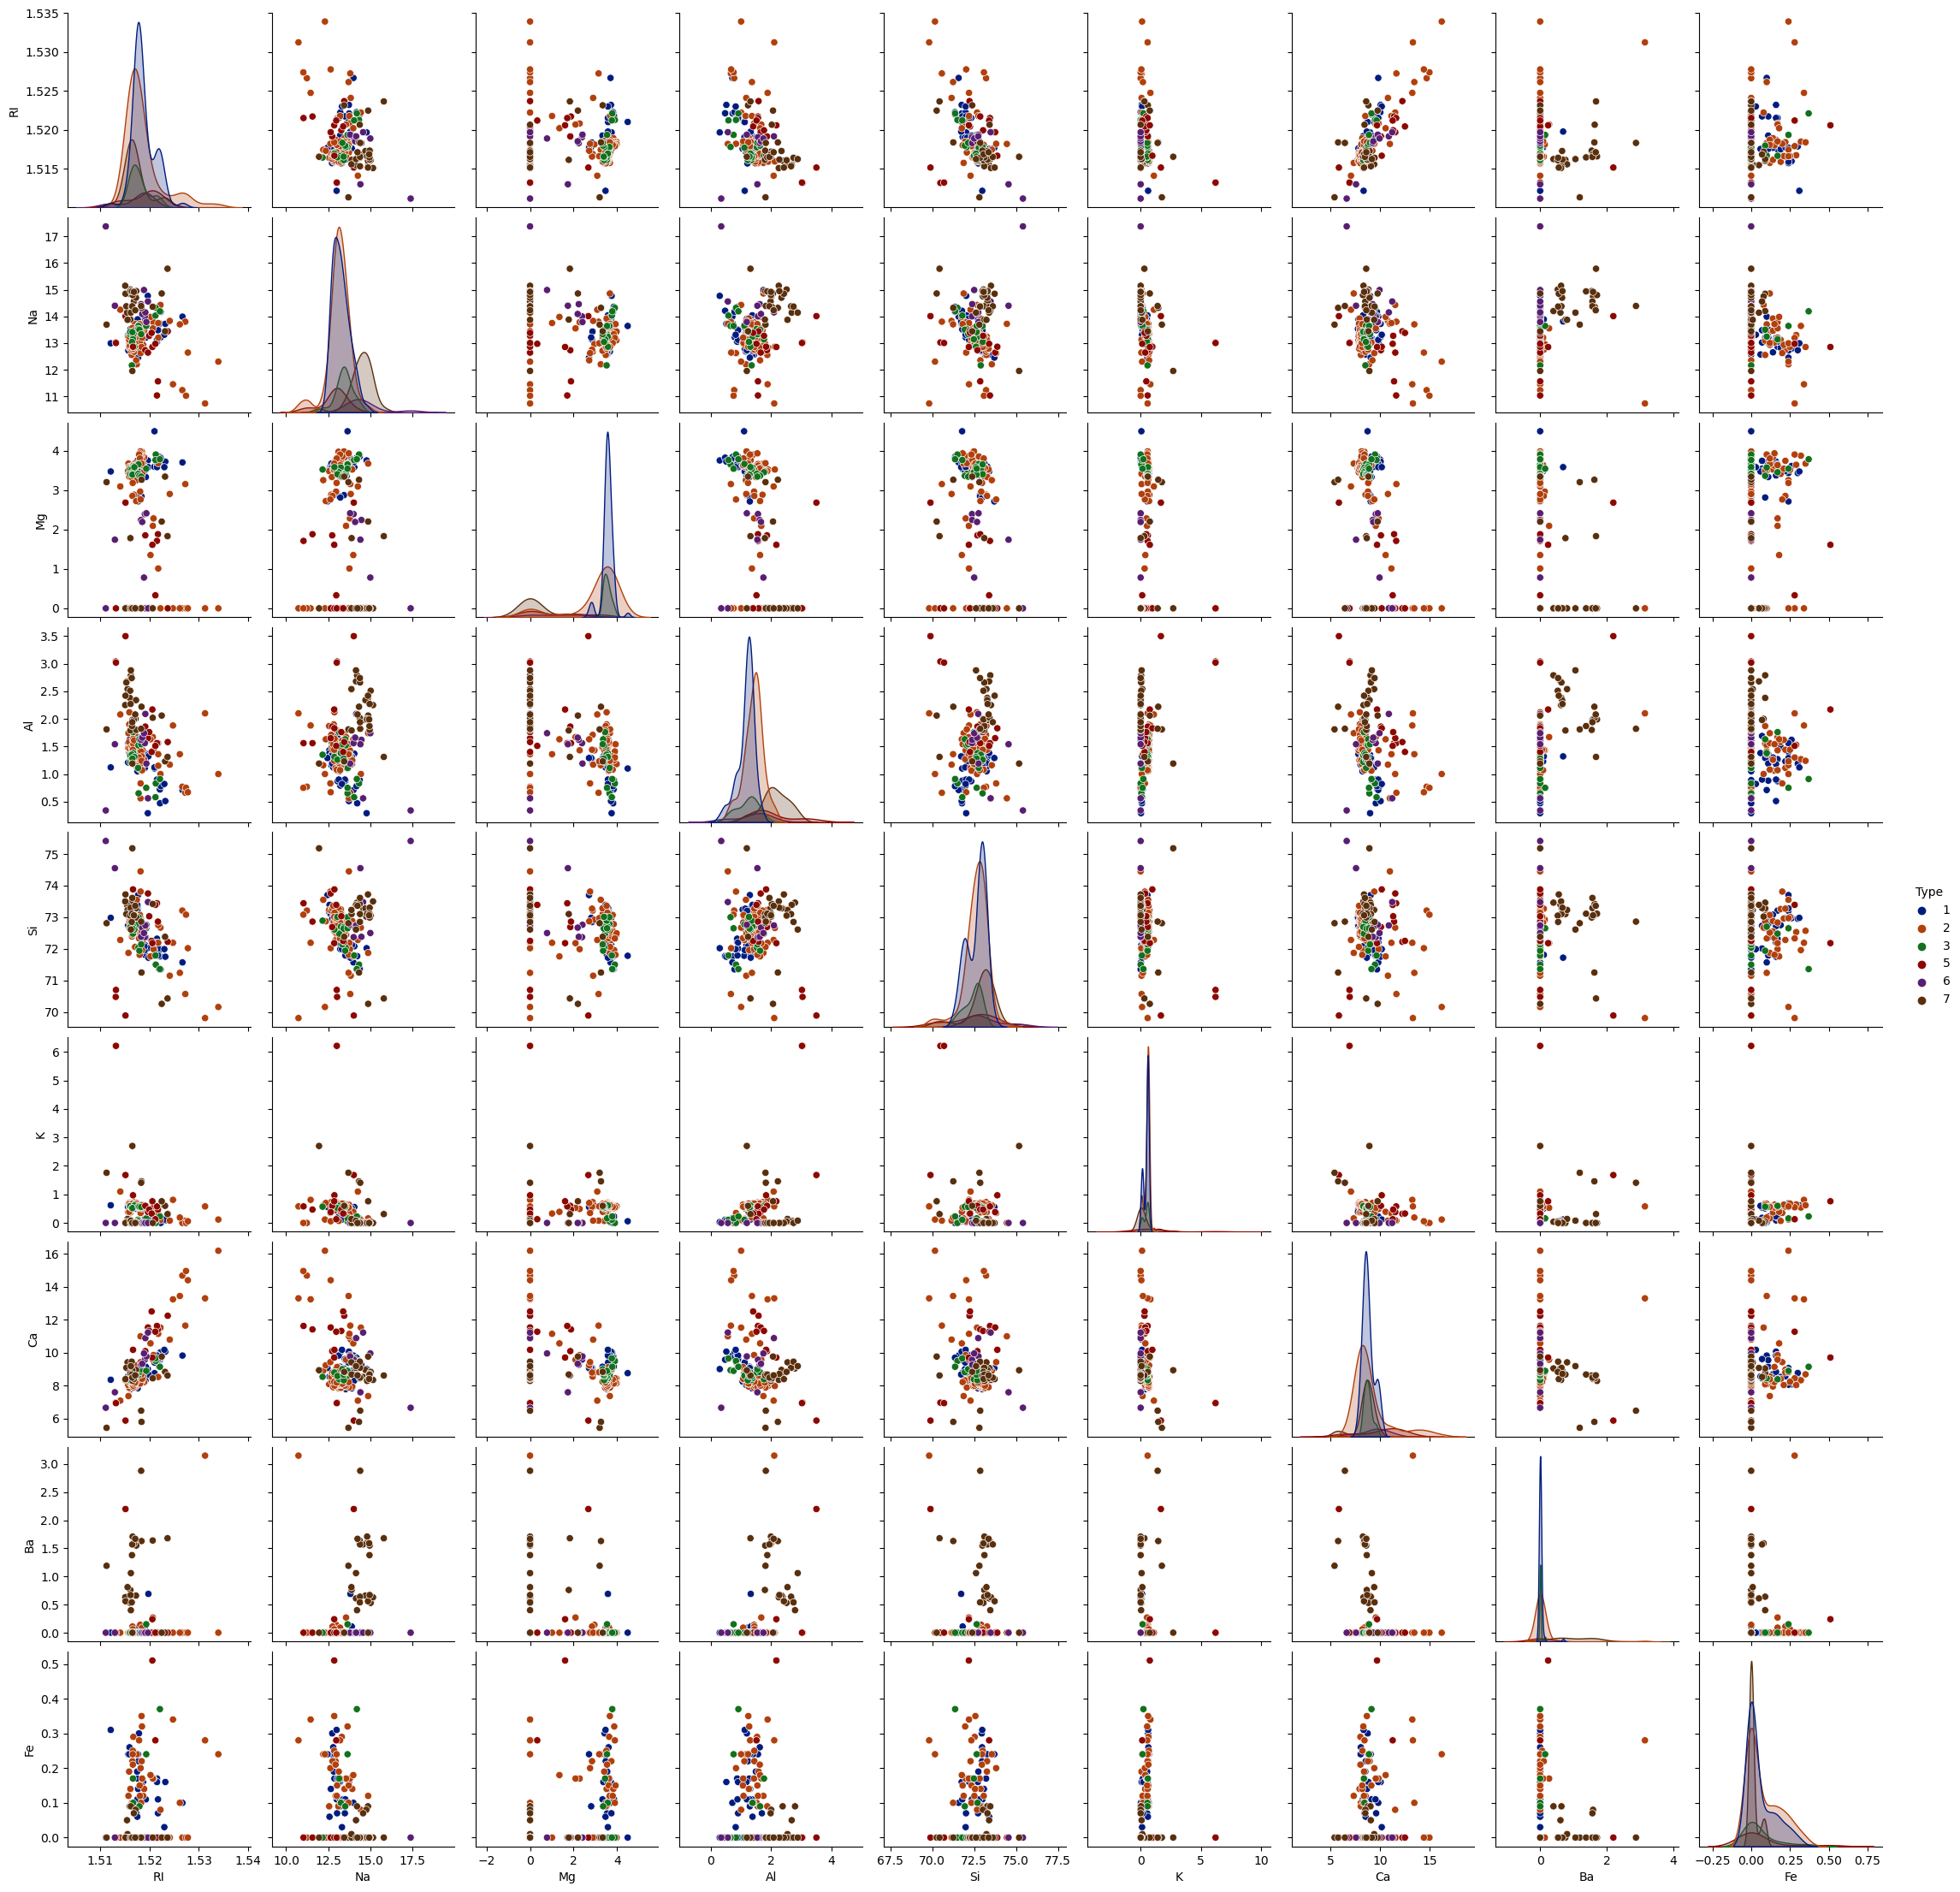

In [11]:
# create a pair plot with hue as Type

sns.pairplot(df, hue='Type', palette='dark')
plt.show()

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

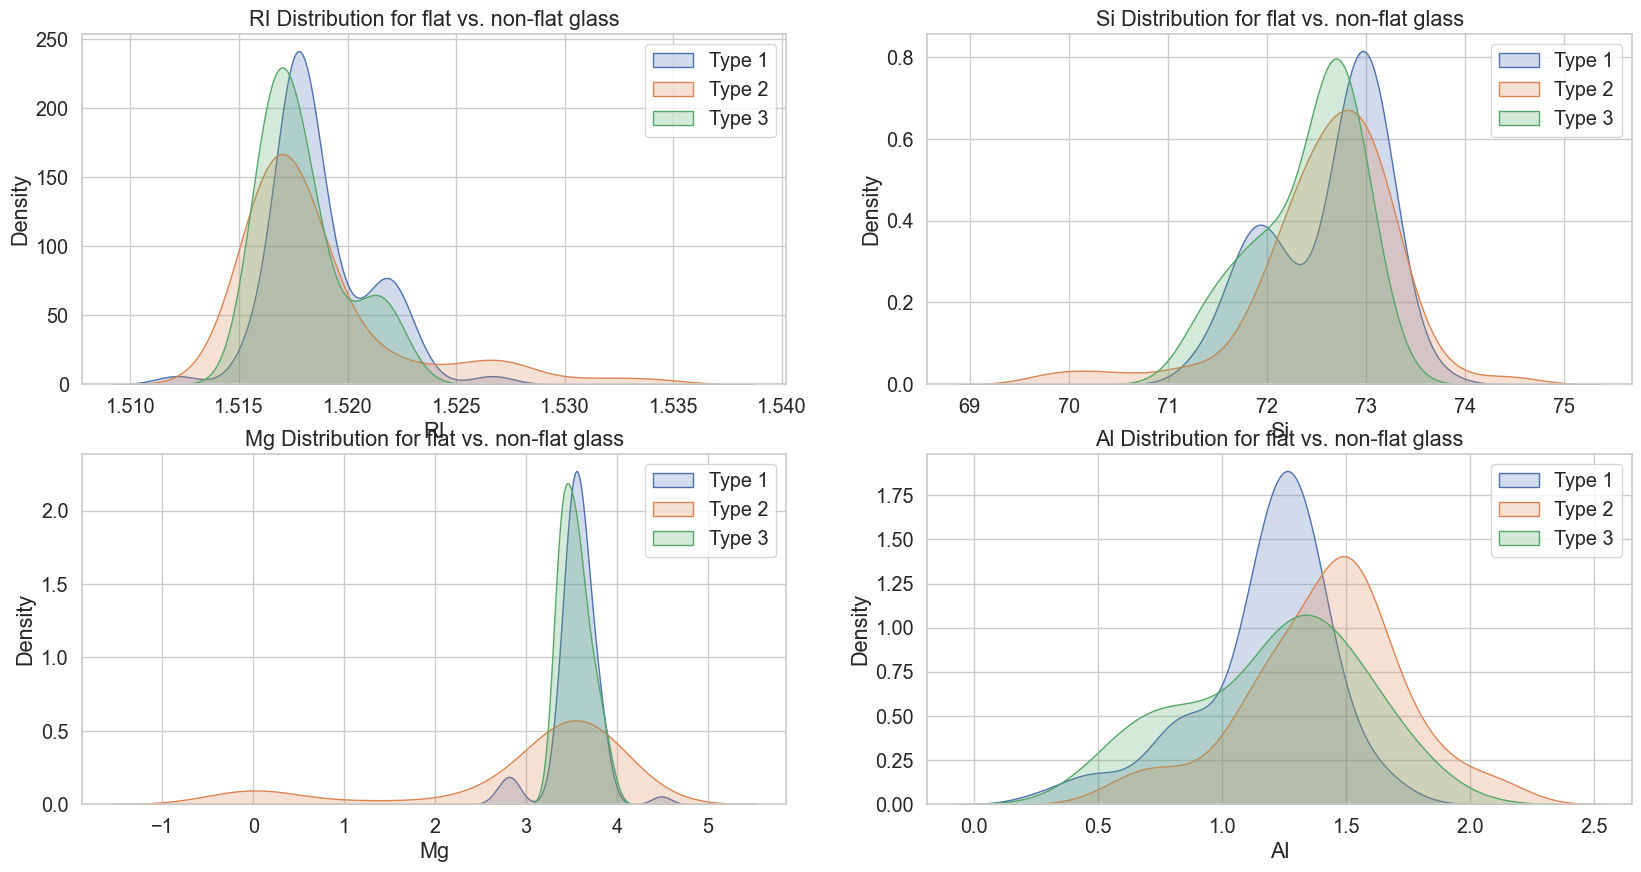

In [12]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df.Type == 1], shade = True)
sns.kdeplot(df["RI"][df.Type == 2], shade = True)
sns.kdeplot(df["RI"][df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df.Type == 1], shade = True)
sns.kdeplot(df["Si"][df.Type == 2], shade = True)
sns.kdeplot(df["Si"][df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df.Type == 1], shade = True)
sns.kdeplot(df["Mg"][df.Type == 2], shade = True)
sns.kdeplot(df["Mg"][df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df.Type == 1], shade = True)
sns.kdeplot(df["Al"][df.Type == 2], shade = True)
sns.kdeplot(df["Al"][df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high.

### Feature Selection using PCA

Let us plot a correlation heatmap to identify multicollinearity

<Axes: >

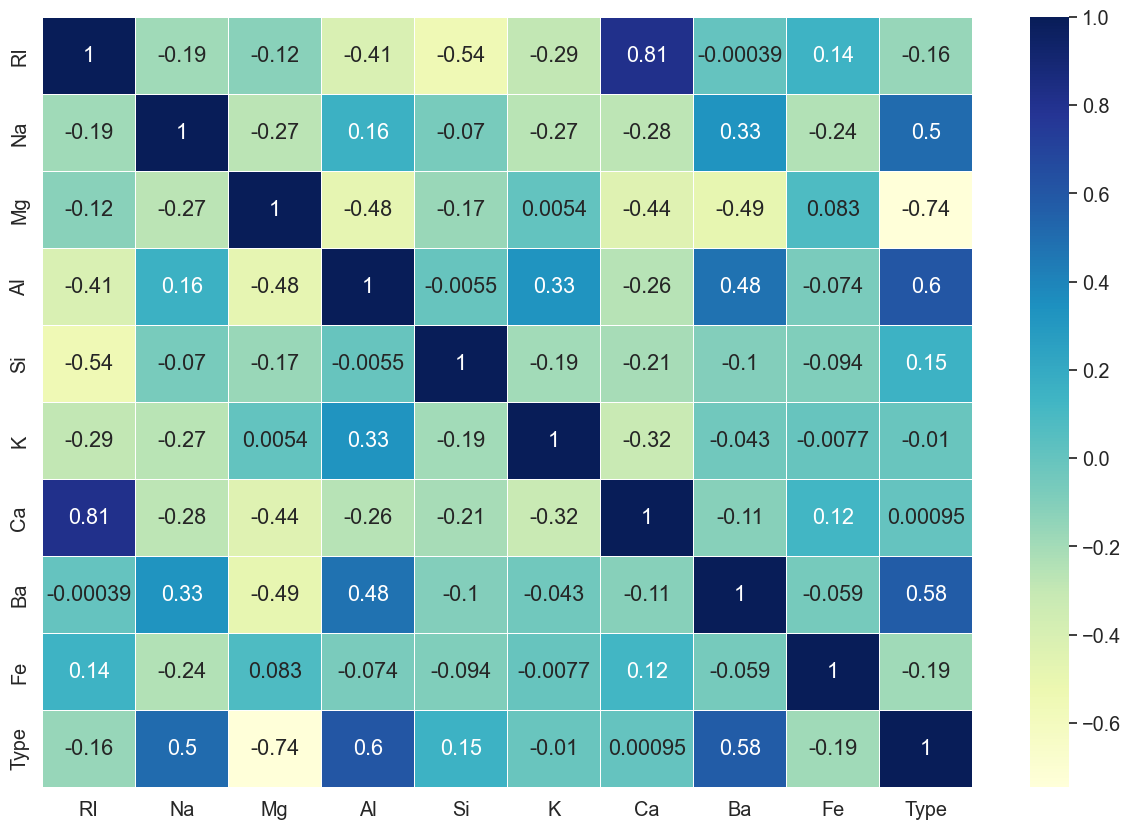

In [13]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


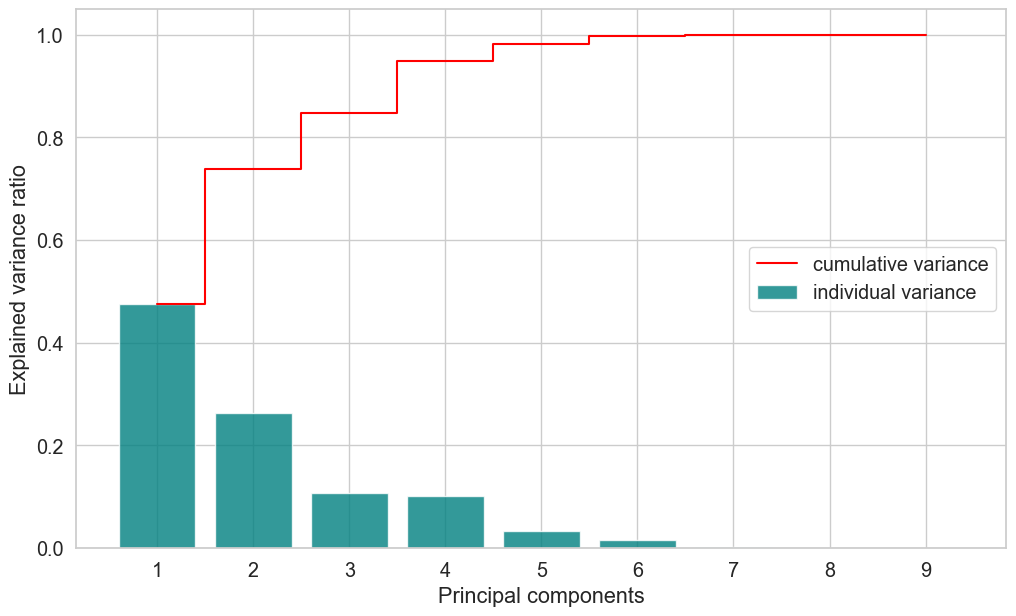

In [14]:
# Performing PCA

from sklearn.decomposition import PCA

X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [15]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

### Model Development

In [16]:
# For data science and machine learning techniques

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 

In [17]:
# Separating the response (y) and explanatory (x) variables

X = X_reduced
y = df["Type"].values

In [18]:
# Splitting the dataset into test and training with 70% for training the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)


# Check whether the train and test have instances of all the glass types

print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [19]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [20]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,Gradient Boost,0.676923
2,Decision Tree,0.646154
3,Random Forest,0.738462


SVM gives the highest accuracy and all the features seem to be important from the other models. So, we will retain SVM as our final model and perform hyperparameter tuning to improve it.

### Hyperparameter tuning

In [21]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Running final model

In [22]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.8

### Model Performance

Text(269.25, 0.5, 'Tredicted label')

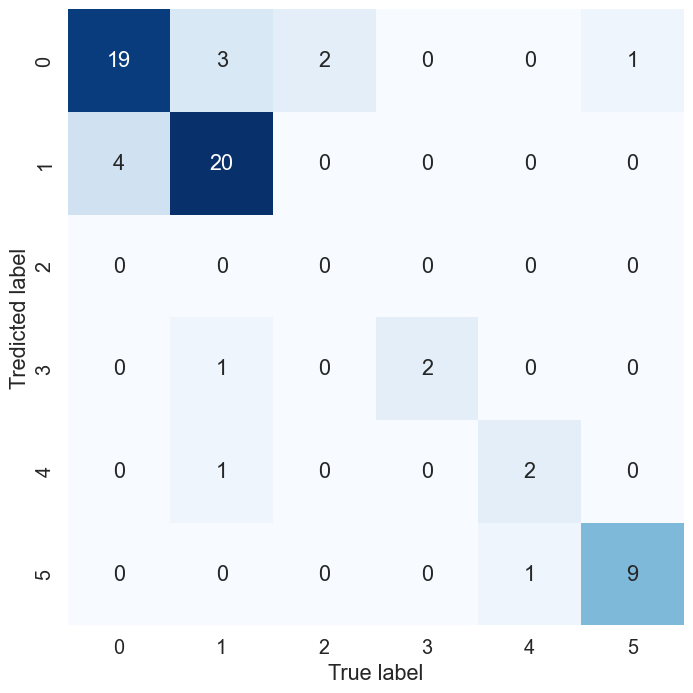

In [23]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Tredicted label')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.83      0.79        23
           2       0.83      0.80      0.82        25
           3       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2
           6       0.67      0.67      0.67         3
           7       0.90      0.90      0.90        10

    accuracy                           0.80        65
   macro avg       0.64      0.70      0.66        65
weighted avg       0.78      0.80      0.79        65



In [25]:
# Training the model with the entire data (Since cross-validation is already done)

svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

### Conclusion


We see that overall model identifies most of the glass types correctly - type 1,2, 5 and 7, but not the rest. It could be due to the dataset being unbalanced in number of instances of each type. There is also some confusion among type 1, 2 and 3 which we had sensed while performing the EDA.